# Requisite libraries installation and importing

In [39]:
from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [ ]:
#Obtaining the working directory

In [72]:
current_dir = os.getcwd()
print('Current woring directort is: %s' %current_dir)

Current woring directort is: C:\Users\User\Desktop\ELISHA\ELISHA


#Embedder : This model is Torch-based and is responsible for extracting facial embeddings via deep learning feature extraction.

#detector : We’re using a Caffe based DL face detector to localize faces in an image.

In [41]:
#protoPath = path to the prototxt file
protoPath = r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\deploy.prototxt'

#modelPath = path to caffe model
modelPath = r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\res10_300x300_ssd_iter_140000.caffemodel'

detector = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

# load our serialized face embedding model from disk

embedder = cv2.dnn.readNetFromTorch(r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\openface.nn4.small2.v1.t7')

## ADDING  FACIAL DATA TO THE TRAINING DATA SET

In [42]:
import os

# define the name of the directory to be created for your face images

path = r'C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA'

path2 = path + "\elisha_langat"#change the second part to your name i.e firstname_secondname
try:
    os.mkdir(path2)
except OSError:
    print ("Creation of the directory %s failed" % path2)
else:
    print ("Successfully created the directory %s " % path2)


Creation of the directory C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\elisha_langat failed


#Capturing the images using the webcam, press spacebar to capture the images and esc to stop

In [43]:
os.chdir(path2)
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "elisha_langat000{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

elisha_langat0000.jpg written!
elisha_langat0001.jpg written!
elisha_langat0002.jpg written!
elisha_langat0003.jpg written!
elisha_langat0004.jpg written!
elisha_langat0005.jpg written!
elisha_langat0006.jpg written!
elisha_langat0007.jpg written!
elisha_langat0008.jpg written!
elisha_langat0009.jpg written!
elisha_langat00010.jpg written!
elisha_langat00011.jpg written!
elisha_langat00012.jpg written!
elisha_langat00013.jpg written!
elisha_langat00014.jpg written!
elisha_langat00015.jpg written!
elisha_langat00016.jpg written!
elisha_langat00017.jpg written!
elisha_langat00018.jpg written!
elisha_langat00019.jpg written!
elisha_langat00020.jpg written!
elisha_langat00021.jpg written!
elisha_langat00022.jpg written!
elisha_langat00023.jpg written!
elisha_langat00024.jpg written!
elisha_langat00025.jpg written!
elisha_langat00026.jpg written!
elisha_langat00027.jpg written!
elisha_langat00028.jpg written!
elisha_langat00029.jpg written!
elisha_langat00030.jpg written!
elisha_langat00031

In [44]:
os.chdir(current_dir)

In [ ]:
#checking datapath for the images

In [45]:
datapath = r"C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA"

In [46]:
imagePaths = []
main_dir = datapath #'Image Dataset'
main_dir_list = os.listdir(main_dir)
for name in main_dir_list:
    name_dir = os.path.sep.join([main_dir, name])
    name_dir_list = os.listdir(name_dir)
    for image in name_dir_list:
        imagePath = os.path.sep.join([main_dir, name, image])
        imagePaths.append(imagePath)

Image Paths

In [47]:
for i in imagePaths:
    print(i.split(os.path.sep)[-2], " : ",i)
    print()

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0001.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0002.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0003.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0004.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0005.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0006.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0007.jpg

Antonio_Palocci  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Palocci\Antonio_Palocci_0008.jpg

Antonio_Trillanes  :  C:\Users\User\Desktop\ELISHA\ELISHA\FACE DATA\Antonio_Trillanes\Antonio_Trillanes_0001.jpg

Antonio_Trillanes  :  

In [48]:
os.chdir(current_dir)

In [49]:
current_dir

'C:\\Users\\User\\Desktop\\ELISHA\\ELISHA'

# Extract embeddings from face dataset- 

In [50]:
# initialize our lists of extracted facial embeddings and corresponding people names
knownEmbeddings = []
knownNames = []
# initialize the total number of faces processed
total = 0
i = 0

In [51]:
for i in range(len(imagePaths)):
    
    imagePath = imagePaths[i]
    # extract the person name from the image path
    print("[INFO] processing image {}/{}".format(i + 1, len(imagePaths)))
    name = imagePath.split(os.path.sep)[-2]
    
    # load the image, resize it to have a width of 600 pixels (while maintaining the aspect ratio), and then grab the image
    # dimensions
    
    image = cv2.imread(imagePath)
    (h, w) = image.shape[:2]
    
    # construct a blob from the image
    
    imageBlob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300),(104.0, 177.0, 123.0),
                                      swapRB=False, crop=False)
    
    # apply OpenCV's deep learning-based face detector to localize faces in the input image
    
    detector.setInput(imageBlob)
    detections = detector.forward()
    
    if len(detections) > 0:
        
        # we're making the assumption that each image has only ONE face, so find the bounding box with the largest probability
        
        i = np.argmax(detections[0, 0, :, 2])
        confidence = detections[0, 0, i, 2]
        
        # ensure that the detection with the largest probability also
        # means our minimum probability test (thus helping filter out
        # weak detections)
        
        if confidence > 0.5:
        
            # compute the (x, y)-coordinates of the bounding box for the face
        
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # extract the face ROI and grab the ROI dimensions
            
            face = image[startY:endY, startX:endX]
            (fH, fW) = face.shape[:2]
            
            # ensure the face width and height are sufficiently large
            
            if fW < 20 or fH < 20:
                continue
            
            # construct a blob for the face ROI, then pass the blob through our face embedding model to obtain the 128-d
            # quantification of the face
            
            faceBlob = cv2.dnn.blobFromImage(face, 1.0 / 255, (96, 96), (0, 0, 0), swapRB=True, crop=False)
            embedder.setInput(faceBlob)
            vec = embedder.forward()
            
            # add the name of the person + corresponding face
            # embedding to their respective lists
            
            knownNames.append(name)
            knownEmbeddings.append(vec.flatten())
            total += 1

[INFO] processing image 1/391
[INFO] processing image 2/391
[INFO] processing image 3/391
[INFO] processing image 4/391
[INFO] processing image 5/391
[INFO] processing image 6/391
[INFO] processing image 7/391
[INFO] processing image 8/391
[INFO] processing image 9/391
[INFO] processing image 10/391
[INFO] processing image 11/391
[INFO] processing image 12/391
[INFO] processing image 13/391
[INFO] processing image 14/391
[INFO] processing image 15/391
[INFO] processing image 16/391
[INFO] processing image 17/391
[INFO] processing image 18/391
[INFO] processing image 19/391
[INFO] processing image 20/391
[INFO] processing image 21/391
[INFO] processing image 22/391
[INFO] processing image 23/391
[INFO] processing image 24/391
[INFO] processing image 25/391
[INFO] processing image 26/391
[INFO] processing image 27/391
[INFO] processing image 28/391
[INFO] processing image 29/391
[INFO] processing image 30/391
[INFO] processing image 31/391
[INFO] processing image 32/391
[INFO] processing

[INFO] processing image 265/391
[INFO] processing image 266/391
[INFO] processing image 267/391
[INFO] processing image 268/391
[INFO] processing image 269/391
[INFO] processing image 270/391
[INFO] processing image 271/391
[INFO] processing image 272/391
[INFO] processing image 273/391
[INFO] processing image 274/391
[INFO] processing image 275/391
[INFO] processing image 276/391
[INFO] processing image 277/391
[INFO] processing image 278/391
[INFO] processing image 279/391
[INFO] processing image 280/391
[INFO] processing image 281/391
[INFO] processing image 282/391
[INFO] processing image 283/391
[INFO] processing image 284/391
[INFO] processing image 285/391
[INFO] processing image 286/391
[INFO] processing image 287/391
[INFO] processing image 288/391
[INFO] processing image 289/391
[INFO] processing image 290/391
[INFO] processing image 291/391
[INFO] processing image 292/391
[INFO] processing image 293/391
[INFO] processing image 294/391
[INFO] processing image 295/391
[INFO] p

In [52]:
data = {"embeddings": knownEmbeddings, "names": knownNames}
f = open('Trined_Embeddings', "wb")
f.write(pickle.dumps(data))
f.close()

# Train face recognition model- 
ensure you have keras and tensorflow installed

In [53]:
# RUN THIS LINE IF YOU DO NOT HAVE TENSORFLOW INSTALLED
!pip install tensorflow --user

In [54]:
!pip install keras 

In [ ]:
#importing of the required libraries

In [55]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle
from sklearn.preprocessing import LabelEncoder

In [56]:
model = Sequential([Dense(128, input_shape = (128,), activation = 'relu'),
                    Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'),
                    Dense(64, activation = 'relu',  kernel_initializer = 'he_uniform'),
                    Dense(32, activation = 'relu',  kernel_initializer = 'he_uniform'),
                    Dense(32, activation = 'relu',  kernel_initializer = 'he_uniform'),
                    Dense(9, activation = 'softmax')])

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam' ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 297       
Total params: 32,361
Trainable params: 32,361
Non-trainable params: 0
__________________________________________________

In [57]:
data = pickle.loads(open('Trined_Embeddings', "rb").read())

le = LabelEncoder()
labels = le.fit_transform(data["names"])

In [ ]:
#Model fiting

In [59]:
h = model.fit(embeddings, labels, epochs = 50)

Epoch 1/50
11/11 [==============================] - 0s 998us/step - loss: 1.9543 - accuracy: 0.4923
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.9041
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.9131
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.9159
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9284
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.9039
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9080
Epoch 8/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9235
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9449
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.9294
Epoch 11/50
11/11

In [58]:
embeddings = data["embeddings"]
embeddings = np.array(embeddings)

In [60]:
# write the actual face recognition model to disk
model.save('recognizer2.h5')
# write the label encoder to disk
f = open("label_Encoder", "wb")
f.write(pickle.dumps(le))
f.close()

# Recognize faces with OpenCV

In [61]:
from keras.models import load_model

#Loading all the Face Detector Models 

In [62]:


protoPath = r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\deploy.prototxt'
modelPath = r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\res10_300x300_ssd_iter_140000.caffemodel'


detector = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

embedder = cv2.dnn.readNetFromTorch(r'C:\Users\User\Desktop\ELISHA\ELISHA\source files\openface.nn4.small2.v1.t7')

recognizer = load_model('recognizer2.h5')

le = pickle.loads(open("label_Encoder", "rb").read())
#le.classes_[3] = 'Soni'

In [63]:
def image_recognize(image):
    image = cv2.resize(image, (640, 480))
    (h, w) = image.shape[:2]
    imageBlob = cv2.dnn.blobFromImage( cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), 
                                      swapRB=False, crop=False)
    
    detector.setInput(imageBlob)
    detections = detector.forward()
    
    for i in range(0, detections.shape[2]):
    
        # extract the confidence (i.e., probability) associated with the prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections
        if confidence > 0.55:
            # compute the (x, y)-coordinates of the bounding box for the face

            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # extract the face ROI

            face = image[startY:endY, startX:endX]
            (fH, fW) = face.shape[:2]

            # ensure the face width and height are sufficiently large
    
            if fW < 30 or fH < 30:
                continue
                
            faceBlob = cv2.dnn.blobFromImage(face, 1.0 / 255, (96, 96), (0, 0, 0), swapRB=True, crop=False)
            embedder.setInput(faceBlob)
            vec = embedder.forward()

            # perform classification to recognize the face
            
            preds = recognizer.predict(vec)[0]
            j = np.argmax(preds)

            proba = preds[j]
            name = le.classes_[j]
            if proba >= 0.0:
                text = name

                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
                cv2.putText(image, text, (startX, startY), cv2.FONT_HERSHEY_DUPLEX, 1.2, (0, 255, 0), 2)

    return np.array(image)

In [64]:
# ADD YOUR FACIAL DATA TO THE model_test directory just add one 
#PRESS THE SPACE BAR ONCE THEN PRESS ESCAPE

In [65]:
test_dir = r"C:\Users\User\Desktop\ELISHA\ELISHA\model_test_data" #test directory

In [66]:

os.chdir(test_dir)
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        #image_name = "firstname_secondname_{}.png".format(img_counter)
        img_name = "elisha_langat_000{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()
os.chdir(current_dir)

elisha_langat_0000.png written!
elisha_langat_0001.png written!
elisha_langat_0002.png written!
elisha_langat_0003.png written!
elisha_langat_0004.png written!
elisha_langat_0005.png written!
elisha_langat_0006.png written!
elisha_langat_0007.png written!
elisha_langat_0008.png written!
elisha_langat_0009.png written!
elisha_langat_00010.png written!
elisha_langat_00011.png written!
elisha_langat_00012.png written!
elisha_langat_00013.png written!
elisha_langat_00014.png written!
elisha_langat_00015.png written!
elisha_langat_00016.png written!
elisha_langat_00017.png written!
elisha_langat_00018.png written!
elisha_langat_00019.png written!
elisha_langat_00020.png written!
elisha_langat_00021.png written!
elisha_langat_00022.png written!
elisha_langat_00023.png written!
elisha_langat_00024.png written!
elisha_langat_00025.png written!
elisha_langat_00026.png written!
elisha_langat_00027.png written!
elisha_langat_00028.png written!
elisha_langat_00029.png written!
elisha_langat_00030.

In [67]:
data_1 = test_dir
imagePaths = []
main_dir = data_1
main_dir_list = os.listdir(main_dir)
for image in main_dir_list:
    imagePath = os.path.sep.join([main_dir, image])
    imagePaths.append(imagePath)

In [68]:
import matplotlib.pyplot as plt

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


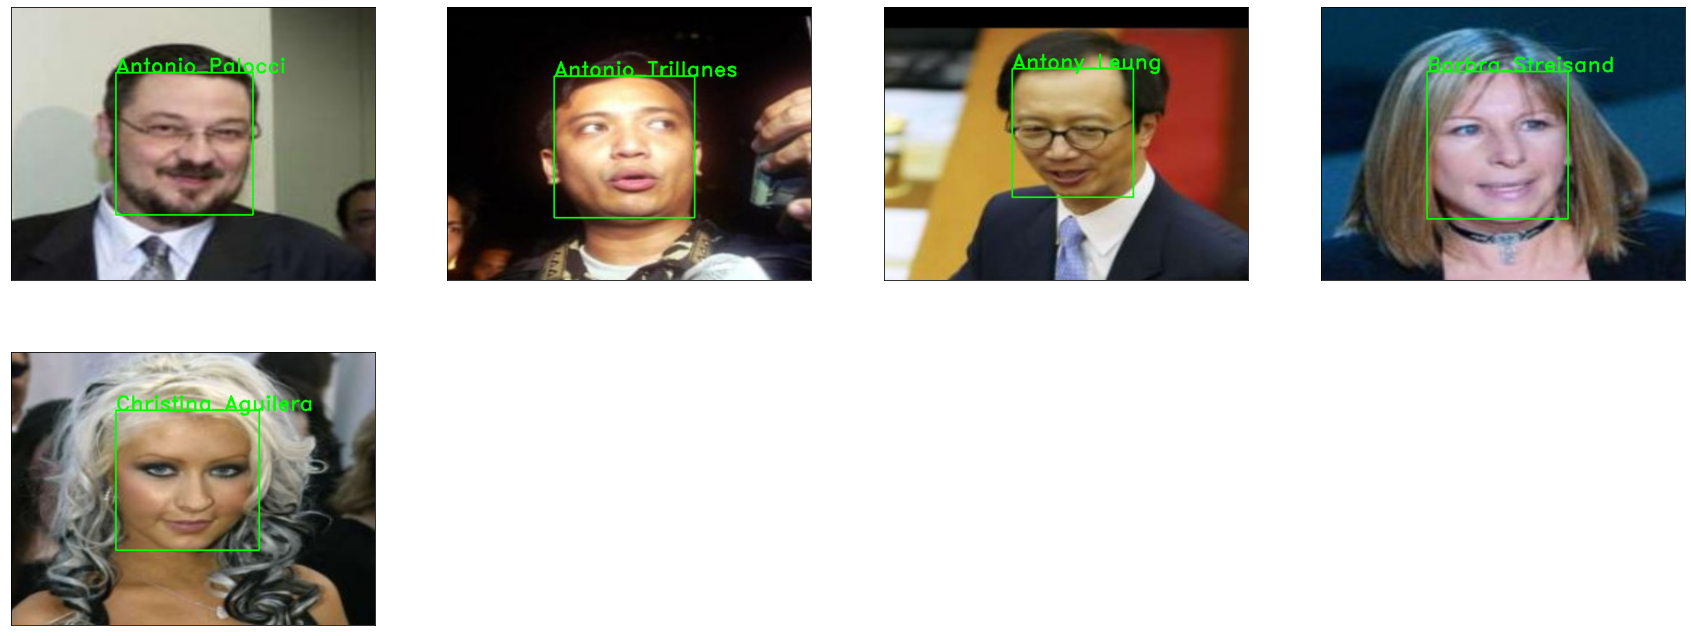

In [71]:
c = 1
fig = plt.figure(figsize = (30,18)) 
for i in imagePaths:
    image = cv2.imread(i)
    image= image_recognize(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig.add_subplot(3,4,c)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    c += 1
plt.show()

In [38]:
print(os.getcwd())

C:\Users\User\Desktop\ELISHA\ELISHA
